# Spam Mail Detection

### Import Libraries

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

### Data Collection & Pre-Processing

In [78]:
data = pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [80]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [81]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<Axes: ylabel='Category'>

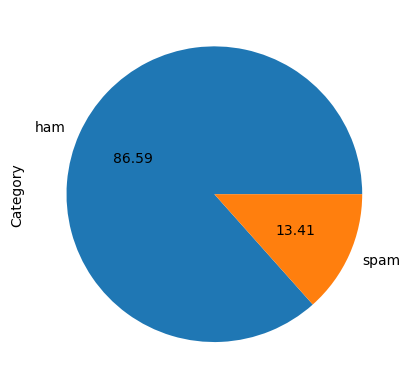

In [82]:
data["Category"].value_counts().plot(kind='pie',autopct='%.2f')

In [83]:
data['Category'] = data['Category'].map({'ham': 1, 'spam': 0})

In [84]:
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [85]:
X = data['Message']
y = data['Category']

In [86]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [87]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

### Splitting the data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['Category'])

### Feature Extraction

In [89]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train = feature_extraction.fit_transform(X_train)
X_test = feature_extraction.transform(X_test)

### Model development

In [90]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Accuracy Score: {accuracy}")
print(f"R2 Score: {r2}")

Accuracy Score: 0.9596412556053812
R2 Score: 0.651402726249531


In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")
print(f"R2 Score: {r2}")

Accuracy Score: 0.9739910313901345
R2 Score: 0.7753484235830311


Confusion matrix:
 [[121  28]
 [  1 965]]
**********************************************


/var/folders/mn/styx4vqn4gx_1w9g8y2k3rn00000gn/T/ipykernel_34079/870665045.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/mn/styx4vqn4gx_1w9g8y2k3rn00000gn/T/ipykernel_34079/870665045.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


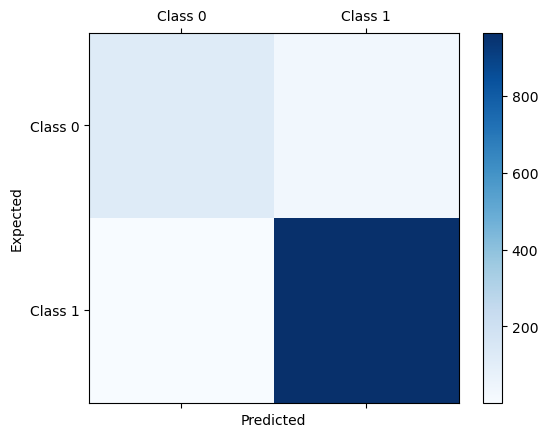

In [92]:
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

print('**********************************************')

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['Category'])
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [94]:
classifier.score(X_test,y_test)

0.9775784753363229

In [95]:
y_pred = classifier.predict(X_test)
r2_score(y_test, y_pred)

0.8063348479164061

### Predictive System

In [97]:
input_mail = ['Hi Jacob, just checking in to see if you received my email regardingt he documents from yesterday.']
input_features = vectorizer.transform(input_mail)

prediction = classifier.predict(input_features)

if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail
